In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [8]:
df=pd.read_csv('mnist_train.csv')

In [12]:
df.shape

(60000, 785)

In [16]:
df.sample(2)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
23345,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3989,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X=df.drop(columns=['label'])

In [20]:
y=df['label']

In [24]:
import seaborn as sns

<Axes: >

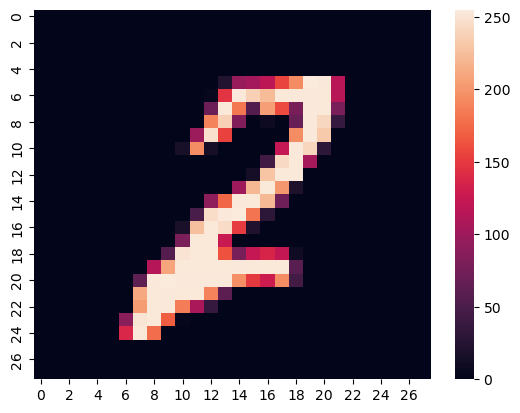

In [53]:
sns.heatmap(np.array(X.iloc[3989]).reshape(28,28))

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=104)

In [57]:
X_train.shape

(42000, 784)

In [59]:
knn_1=KNeighborsClassifier(n_neighbors=205)

In [61]:
import time

In [65]:
knn_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=205)

In [69]:
start=time.time()
y_pred=knn_1.predict(X_test)
print(time.time()-start)

12.931372880935669


In [71]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [77]:
accuracy_score(y_test,y_pred)

0.916

In [79]:
from sklearn.model_selection import GridSearchCV

In [81]:
params={
    'n_neighbors':[1, 3, 5, 7, 9, 11]
}

In [111]:
grid_search=GridSearchCV(knn_1,params,scoring='accuracy',cv=10)#verbose=2

In [113]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=205),
             param_grid={'n_neighbors': [5, 50, 100, 200, 205, 250]},
             scoring='accuracy')

In [115]:
grid_search.best_params_

{'n_neighbors': 5}

In [117]:
grid_search.best_score_

0.9681666666666666

In [121]:
grid_search.best_estimator_

KNeighborsClassifier()

In [123]:
knn_2=KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_train,y_train)
start=time.time()
y_pred=knn_2.predict(X_test)
print(time.time()-start)

11.327819108963013


In [125]:
accuracy_score(y_test,y_pred)

0.9681111111111111

In [127]:
pca=PCA(n_components=200)

In [137]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [143]:
knn_3=KNeighborsClassifier(n_neighbors=5)
knn_3.fit(X_train_trf,y_train)
start=time.time()
y_pred=knn_3.predict(X_test_trf)
print(time.time()-start)

1.4709091186523438


In [145]:
accuracy_score(y_test,y_pred)

0.9704444444444444

In [147]:
params={
    'n_components':[50, 100, 150, 200, 250, 300]
}

In [149]:
grid_search=GridSearchCV(pca,params,cv=5)

In [151]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=PCA(n_components=200),
             param_grid={'n_components': [50, 100, 150, 200, 250, 300]})

In [153]:
grid_search.best_params_

{'n_components': 300}

In [158]:
pca=PCA(n_components=300)
X_train_trf_2=pca.fit_transform(X_train)
X_test_trf_2=pca.transform(X_test)

In [162]:
knn_4=KNeighborsClassifier(n_neighbors=5)
knn_4.fit(X_train_trf_2,y_train)
start=time.time()
y_pred=knn_4.predict(X_test_trf_2)
print(time.time()-start)

2.023010730743408


In [164]:
accuracy_score(y_test,y_pred)

0.9685555555555555

In [166]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [168]:
pca.explained_variance_ratio_

array([9.74097117e-02, 7.09427419e-02, 6.16542958e-02, 5.40506207e-02,
       4.86393922e-02, 4.29767614e-02, 3.26415402e-02, 2.88794281e-02,
       2.76045839e-02, 2.35819184e-02, 2.10251054e-02, 2.02790854e-02,
       1.71639045e-02, 1.69345420e-02, 1.57568422e-02, 1.48493284e-02,
       1.33128003e-02, 1.27450049e-02, 1.18572910e-02, 1.15792560e-02,
       1.06621976e-02, 1.00942857e-02, 9.53726485e-03, 9.12431841e-03,
       8.82377949e-03, 8.34754144e-03, 8.14516655e-03, 7.86816106e-03,
       7.47733971e-03, 6.87323171e-03, 6.62898746e-03, 6.49220717e-03,
       6.01766226e-03, 5.86359907e-03, 5.65858672e-03, 5.43226099e-03,
       5.09417534e-03, 4.88253986e-03, 4.82133958e-03, 4.69561122e-03,
       4.55978141e-03, 4.46088783e-03, 4.19341856e-03, 3.96207047e-03,
       3.83036690e-03, 3.77201373e-03, 3.60319611e-03, 3.50274131e-03,
       3.39416942e-03, 3.21457626e-03, 3.19978550e-03, 3.14008545e-03,
       2.95493619e-03, 2.88096059e-03, 2.82530504e-03, 2.70307434e-03,
      

In [170]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09740971, 0.16835245, 0.23000675, 0.28405737, 0.33269676,
       0.37567352, 0.40831506, 0.43719449, 0.46479908, 0.48838099,
       0.5094061 , 0.52968519, 0.54684909, 0.56378363, 0.57954047,
       0.5943898 , 0.6077026 , 0.62044761, 0.6323049 , 0.64388415,
       0.65454635, 0.66464064, 0.6741779 , 0.68330222, 0.692126  ,
       0.70047354, 0.70861871, 0.71648687, 0.72396421, 0.73083744,
       0.73746643, 0.74395864, 0.7499763 , 0.7558399 , 0.76149848,
       0.76693074, 0.77202492, 0.77690746, 0.7817288 , 0.78642441,
       0.79098419, 0.79544508, 0.7996385 , 0.80360057, 0.80743094,
       0.81120295, 0.81480615, 0.81830889, 0.82170306, 0.82491763,
       0.82811742, 0.8312575 , 0.83421244, 0.8370934 , 0.83991871,
       0.84262178, 0.84529789, 0.84786332, 0.85038827, 0.85282691,
       0.85524857, 0.85765732, 0.85994906, 0.86217119, 0.86430087,
       0.86637131, 0.86839481, 0.87036309, 0.87228114, 0.87416462,
       0.87604475, 0.87786199, 0.8796449 , 0.88138997, 0.88304

In [174]:
from scipy.interpolate import interp1d

The x-value corresponding to y = 0.91069064 is approximately: 0.16201660275301347


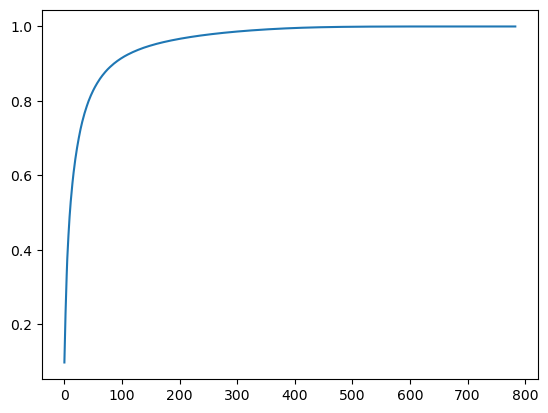

In [184]:
# Define the target y-value
target_y = 0.91069064

# Use interpolation to find corresponding x-value(s)
f = interp1d(x=range(0,784),y=np.cumsum(pca.explained_variance_ratio_), bounds_error=False)
x_value = f(target_y)

# Print the result
print(f"The x-value corresponding to y = {target_y} is approximately: {x_value}")
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [186]:
pca=PCA(n_components=162)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)
knn_4=KNeighborsClassifier(n_neighbors=5)
knn_4.fit(X_train_trf,y_train)
start=time.time()
y_pred=knn_4.predict(X_test_trf)
print(time.time()-start)
print(accuracy_score(y_test,y_pred))

1.2141871452331543
0.9703333333333334
